<a href="https://colab.research.google.com/github/Marcus0805/Real-Circulante/blob/main/Real_Circulante2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 - Importei as bibliotecas

import pandas as pd
import numpy as py
import datetime
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
#2 - Abri o dataframe, separei a Data da Classe, troquei os decimais por ponto e adicionei os nomes no cabeçalho.

df=pd.read_csv('/Users/MarcusAbrantes/Downloads/MoedaCirculante_DadosAbertos.csv', header=None,sep=';', decimal=',', thousands='.', names=['Data','Classe','Valor','Quantidade'])
print(df)

              Data                       Classe  Valor    Quantidade
0       02/01/1995  Moedas - 1a. Família (inox)   0.01  834342314.00
1       02/01/1995  Moedas - 1a. Família (inox)   0.05  636711876.00
2       02/01/1995  Moedas - 1a. Família (inox)   0.10  583076666.00
3       02/01/1995  Moedas - 1a. Família (inox)   0.25  146883388.00
4       02/01/1995  Moedas - 1a. Família (inox)   0.50  329791540.00
...            ...                          ...    ...           ...
443334  04/05/2023        Cédulas - 1a. família  50.00   49190430.00
443335  04/05/2023        Cédulas - 2a. família  50.00 1750651114.00
443336  04/05/2023        Cédulas - 1a. família 100.00   12140385.00
443337  04/05/2023        Cédulas - 2a. família 100.00 1777038412.00
443338  04/05/2023        Cédulas - 2a. família 200.00  125265902.00

[443339 rows x 4 columns]


In [ ]:
#3 - transformamei os valores da coluna Data para o datetime do Pandas

df['Data'] = pd.to_datetime(df['Data'])
df

/var/folders/4n/mmw8qv252gx7lnbl6xssd5q40000gp/T/ipykernel_1277/376960807.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data'] = pd.to_datetime(df['Data'])


,Data,Classe,Valor,Quantidade
0,1995-02-01,Moedas - 1a. Família (inox),0.01,834342314.00
1,1995-02-01,Moedas - 1a. Família (inox),0.05,636711876.00
2,1995-02-01,Moedas - 1a. Família (inox),0.10,583076666.00
3,1995-02-01,Moedas - 1a. Família (inox),0.25,146883388.00
4,1995-02-01,Moedas - 1a. Família (inox),0.50,329791540.00
...,...,...,...,...
443334,2023-04-05,Cédulas - 1a. família,50.00,49190430.00
443335,2023-04-05,Cédulas - 2a. família,50.00,1750651114.00
443336,2023-04-05,Cédulas - 1a. família,100.00,12140385.00
443337,2023-04-05,Cédulas - 2a. família,100.00,1777038412.00


In [ ]:
#4 - Nesse passo, usei funções do datetime para separar os períodos com intuito de trazer uma visualização mais fácil

df['Mês'] = df['Data'].dt.month
df['Trimestre'] = df['Data'].dt.quarter
df['Semestre'] = (df['Data'].dt.quarter + 1) // 2
df['Mês/Ano'] = df['Data'].dt.to_period('M')
df['Ano'] = df['Data'].dt.year
df

,Data,Classe,Valor,Quantidade,Mês,Trimestre,Semestre,Mês/Ano,Ano
0,1995-02-01,Moedas - 1a. Família (inox),0.01,834342314.00,2,1,1,1995-02,1995
1,1995-02-01,Moedas - 1a. Família (inox),0.05,636711876.00,2,1,1,1995-02,1995
2,1995-02-01,Moedas - 1a. Família (inox),0.10,583076666.00,2,1,1,1995-02,1995
3,1995-02-01,Moedas - 1a. Família (inox),0.25,146883388.00,2,1,1,1995-02,1995
4,1995-02-01,Moedas - 1a. Família (inox),0.50,329791540.00,2,1,1,1995-02,1995
...,...,...,...,...,...,...,...,...,...
443334,2023-04-05,Cédulas - 1a. família,50.00,49190430.00,4,2,1,2023-04,2023
443335,2023-04-05,Cédulas - 2a. família,50.00,1750651114.00,4,2,1,2023-04,2023
443336,2023-04-05,Cédulas - 1a. família,100.00,12140385.00,4,2,1,2023-04,2023
443337,2023-04-05,Cédulas - 2a. família,100.00,1777038412.00,4,2,1,2023-04,2023


In [ ]:
#5 - Adicionei colunas de quantidades em bilhões e em milhões para facilitar a leitura e criação de gráficos.

df['Quantidade em Bilhões'] = df['Quantidade'] / 1000000000
df['Quantidade em Milhões'] = df['Quantidade'] / 1000000

In [ ]:
#6 - Reordenei as colunas

nova_ordem = nova_ordem = ['Data' , 'Classe', 'Valor', 'Quantidade' , 'Quantidade em Bilhões' , 'Quantidade em Milhões' , 'Mês' , 'Trimeste' , 'Semestre' ,'Ano', 'Mês/Ano']
df=df.reindex(columns=nova_ordem)
df

,Data,Classe,Valor,Quantidade,Quantidade em Bilhões,Quantidade em Milhões,Mês,Trimeste,Semestre,Ano,Mês/Ano
0,1995-02-01,Moedas - 1a. Família (inox),0.01,834342314.00,0.83,834.34,2,NaN,1,1995,1995-02
1,1995-02-01,Moedas - 1a. Família (inox),0.05,636711876.00,0.64,636.71,2,NaN,1,1995,1995-02
2,1995-02-01,Moedas - 1a. Família (inox),0.10,583076666.00,0.58,583.08,2,NaN,1,1995,1995-02
3,1995-02-01,Moedas - 1a. Família (inox),0.25,146883388.00,0.15,146.88,2,NaN,1,1995,1995-02
4,1995-02-01,Moedas - 1a. Família (inox),0.50,329791540.00,0.33,329.79,2,NaN,1,1995,1995-02
...,...,...,...,...,...,...,...,...,...,...,...
443334,2023-04-05,Cédulas - 1a. família,50.00,49190430.00,0.05,49.19,4,NaN,1,2023,2023-04
443335,2023-04-05,Cédulas - 2a. família,50.00,1750651114.00,1.75,1750.65,4,NaN,1,2023,2023-04
443336,2023-04-05,Cédulas - 1a. família,100.00,12140385.00,0.01,12.14,4,NaN,1,2023,2023-04
443337,2023-04-05,Cédulas - 2a. família,100.00,1777038412.00,1.78,1777.04,4,NaN,1,2023,2023-04


In [ ]:
#7 - Agrupei o df juntando todas as Classes e ignorando os anos de produção

df_agrupado1 = df.groupby(['Valor']).agg({'Classe': lambda x: ', '.join(x.unique()), 'Quantidade': 'sum'}).reset_index()
df_agrupado1

,Valor,Classe,Quantidade
0,0.01,"Moedas - 1a. Família (inox), Moedas - 2a. Família",19993556538794.00
1,0.05,"Moedas - 1a. Família (inox), Moedas - 2a. Famí...",26924465212099.00
2,0.10,"Moedas - 1a. Família (inox), Moedas - 2a. Família",28697712248246.00
3,0.25,"Moedas - 1a. Família (inox), Moedas - 2a. Família",12039720824187.00
4,0.50,"Moedas - 1a. Família (inox), Moedas - 2a. Famí...",11485114147557.00
5,1.00,"Cédulas - 1a. família, Moedas - 1a. Família (i...",14072169510399.00
6,2.00,"Moedas comemorativas 300 anos CMB, Moedas come...",4565686283709.00
7,3.00,"Moedas comemorativas 30 anos BC, Moedas comemo...",162657847.00
8,4.00,"Moedas comemorativas Tetra campeonato, Cartela...",63239133.00
9,5.00,"Cédulas - 1a. família, Moedas comemorativas qu...",2630220335599.00


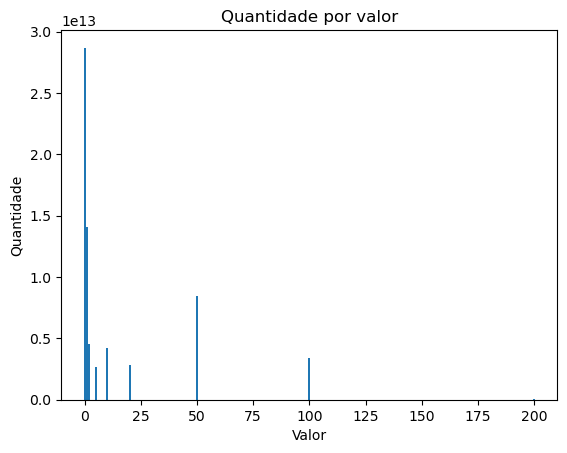

In [ ]:
#8 - Criei um gráfico para representar esses dados

plt.bar(df_agrupado1['Valor'], df_agrupado1['Quantidade'])
plt.xlabel('Valor')
plt.ylabel('Quantidade')
plt.title('Quantidade por valor')
plt.show()

In [ ]:
#9 - Aqui ja agrupei o código anterior incluindo o ano de produção

df_agrupado_ano = df.groupby(['Valor', 'Ano']).agg({'Classe': lambda x: ', '.join(x.unique()), 'Quantidade': 'sum'}).reset_index()
df_agrupado_ano

,Valor,Ano,Classe,Quantidade
0,0.01,1995,Moedas - 1a. Família (inox),253444839027.00
1,0.01,1996,Moedas - 1a. Família (inox),311556138325.00
2,0.01,1997,Moedas - 1a. Família (inox),387887962184.00
3,0.01,1998,"Moedas - 1a. Família (inox), Moedas - 2a. Família",468775983781.00
4,0.01,1999,"Moedas - 2a. Família, Moedas - 1a. Família (inox)",543867182137.00
...,...,...,...,...
405,100.00,2023,"Cédulas - 1a. família, Cédulas - 2a. família",152978067906.00
406,200.00,2020,Cédulas - 2a. família,2183055091.00
407,200.00,2021,Cédulas - 2a. família,18270638353.00
408,200.00,2022,Cédulas - 2a. família,26145870980.00


In [ ]:
#df_agrupado_ano_50 = df_agrupado_ano.head(50)
#print(df_agrupado_ano_50)

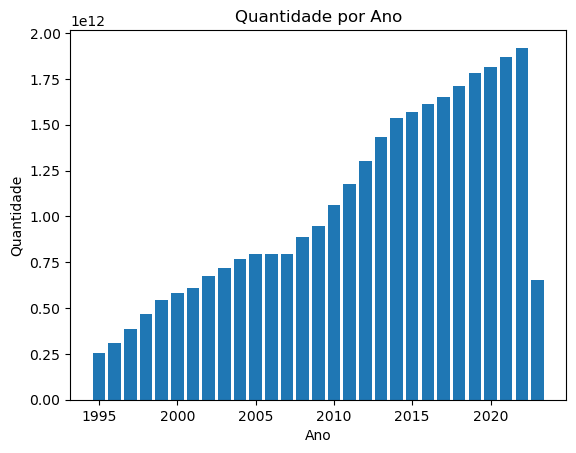

In [ ]:
#10 - Criei um gráfico para representar esses dados
#Esse gráfico mostra a quantidade total agrupada por valor E por ano. As barras representam os anos e altura representa a quantidade total produzida para cada valor nesse ano. Ele mostra como a quantidade de cada valor produzido varia ao longo dos anos.

plt.bar(df_agrupado_ano['Ano'], df_agrupado_ano['Quantidade'])
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Quantidade por Ano')
plt.show()

In [ ]:
#11 - Peguei os dados apartir da criação das notas de 200
data_inicial = datetime.datetime(2020, 8, 2)
data_atual = datetime.datetime.now()

df_isolado200 = df.loc[df['Data'] >= data_inicial]
df_isolado200 = df_isolado200.loc[df_isolado200['Data'] <= data_atual]
df_isolado200

,Data,Classe,Valor,Quantidade,Quantidade em Bilhões,Quantidade em Milhões,Mês,Trimeste,Semestre,Ano,Mês/Ano
335804,2020-09-01,Moedas - 2a. Família,0.01,1200332884.00,1.20,1200.33,9,NaN,2,2020,2020-09
335805,2020-09-01,Moedas - 1a. Família (inox),0.01,1990848952.00,1.99,1990.85,9,NaN,2,2020,2020-09
335806,2020-09-01,Moedas - 2a. Família,0.05,5467031092.00,5.47,5467.03,9,NaN,2,2020,2020-09
335807,2020-09-01,Moedas - 1a. Família (inox),0.05,1319523517.00,1.32,1319.52,9,NaN,2,2020,2020-09
335808,2020-09-01,Moedas - 2a. Família - (A),0.05,48997500.00,0.05,49.00,9,NaN,2,2020,2020-09
...,...,...,...,...,...,...,...,...,...,...,...
443334,2023-04-05,Cédulas - 1a. família,50.00,49190430.00,0.05,49.19,4,NaN,1,2023,2023-04
443335,2023-04-05,Cédulas - 2a. família,50.00,1750651114.00,1.75,1750.65,4,NaN,1,2023,2023-04
443336,2023-04-05,Cédulas - 1a. família,100.00,12140385.00,0.01,12.14,4,NaN,1,2023,2023-04
443337,2023-04-05,Cédulas - 2a. família,100.00,1777038412.00,1.78,1777.04,4,NaN,1,2023,2023-04


In [ ]:
#12 - Isolei o df para as notas de 200

df_notas_200_1 = df.loc[df['Valor'] == 200]
df_notas_200_1

,Data,Classe,Valor,Quantidade,Quantidade em Bilhões,Quantidade em Milhões,Mês,Trimeste,Semestre,Ano,Mês/Ano
356796,2020-02-09,Cédulas - 2a. família,200.00,603995.00,0.00,0.60,2,NaN,1,2020,2020-02
356925,2020-03-09,Cédulas - 2a. família,200.00,3279045.00,0.00,3.28,3,NaN,1,2020,2020-03
357054,2020-04-09,Cédulas - 2a. família,200.00,4774598.00,0.00,4.77,4,NaN,1,2020,2020-04
357183,2020-08-09,Cédulas - 2a. família,200.00,5943413.00,0.01,5.94,8,NaN,2,2020,2020-08
357312,2020-09-09,Cédulas - 2a. família,200.00,6358585.00,0.01,6.36,9,NaN,2,2020,2020-09
...,...,...,...,...,...,...,...,...,...,...,...
442814,2023-04-27,Cédulas - 2a. família,200.00,124521252.00,0.12,124.52,4,NaN,1,2023,2023-04
442945,2023-04-28,Cédulas - 2a. família,200.00,124636121.00,0.12,124.64,4,NaN,1,2023,2023-04
443076,2023-02-05,Cédulas - 2a. família,200.00,124853731.00,0.12,124.85,2,NaN,1,2023,2023-02
443207,2023-03-05,Cédulas - 2a. família,200.00,125265902.00,0.13,125.27,3,NaN,1,2023,2023-03


In [ ]:
#17 - quero algo que represente a quantidade em reais.(Supondo que a coluna quantidade indique a quantidade de cada moeda/nota produzida, e a coluna Valor indique a quantidade de reais, me de uma coluna com a quantidade em reais produzida por ano)

In [ ]:
#13 - O código orinial 17 não estava funcionando então eu o troquei por esse
df['Quantidade em Reais'] = df['Quantidade'] * df['Valor']
df

,Data,Classe,Valor,Quantidade,Quantidade em Bilhões,Quantidade em Milhões,Mês,Trimeste,Semestre,Ano,Mês/Ano,Quantidade em Reais
0,1995-02-01,Moedas - 1a. Família (inox),0.01,834342314.00,0.83,834.34,2,NaN,1,1995,1995-02,8343423.14
1,1995-02-01,Moedas - 1a. Família (inox),0.05,636711876.00,0.64,636.71,2,NaN,1,1995,1995-02,31835593.80
2,1995-02-01,Moedas - 1a. Família (inox),0.10,583076666.00,0.58,583.08,2,NaN,1,1995,1995-02,58307666.60
3,1995-02-01,Moedas - 1a. Família (inox),0.25,146883388.00,0.15,146.88,2,NaN,1,1995,1995-02,36720847.00
4,1995-02-01,Moedas - 1a. Família (inox),0.50,329791540.00,0.33,329.79,2,NaN,1,1995,1995-02,164895770.00
...,...,...,...,...,...,...,...,...,...,...,...,...
443334,2023-04-05,Cédulas - 1a. família,50.00,49190430.00,0.05,49.19,4,NaN,1,2023,2023-04,2459521500.00
443335,2023-04-05,Cédulas - 2a. família,50.00,1750651114.00,1.75,1750.65,4,NaN,1,2023,2023-04,87532555700.00
443336,2023-04-05,Cédulas - 1a. família,100.00,12140385.00,0.01,12.14,4,NaN,1,2023,2023-04,1214038500.00
443337,2023-04-05,Cédulas - 2a. família,100.00,1777038412.00,1.78,1777.04,4,NaN,1,2023,2023-04,177703841200.00


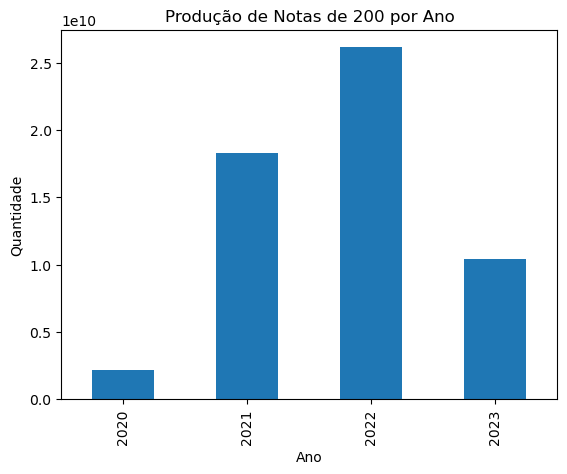

In [ ]:
#14 - Usei o código 12 para montar um gráfico mostrando a quantidade de notas de 200 produzida
df_notas_200 = df.loc[(df['Valor'] == 200) & (df['Ano'] >= 2020)]
df_agrupado_ano = df_notas_200.groupby('Ano')['Quantidade'].sum()

df_agrupado_ano.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Produção de Notas de 200 por Ano')
plt.show()

In [ ]:
#15 - Separei a quantidade em reais produzidas pelas notas de 200
df_cedulas_200 = df[df['Valor'] == 200]
df_agrupado_ano_reais = df_cedulas_200.groupby('Ano')['Quantidade em Reais'].sum()
df_agrupado_ano_reais

Ano
2020    436611018200.00
2021   3654127670600.00
2022   5229174196000.00
2023   2083040475400.00
Name: Quantidade em Reais, dtype: float64

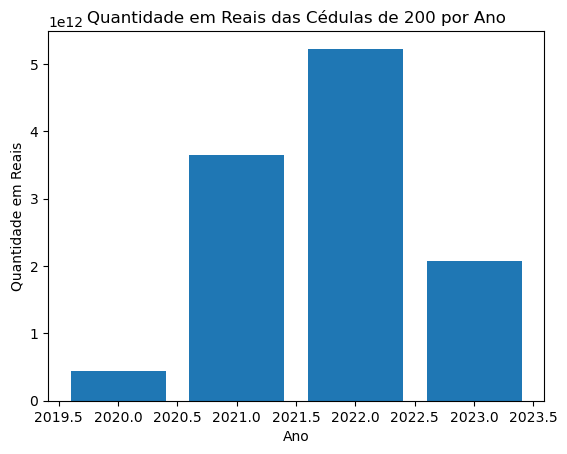

In [ ]:
#16 - Criei um gráfico com as informações anteriores
plt.bar(df_agrupado_ano_reais.index, df_agrupado_ano_reais.values)
plt.xlabel('Ano')
plt.ylabel('Quantidade em Reais')
plt.title('Quantidade em Reais das Cédulas de 200 por Ano')
plt.show()

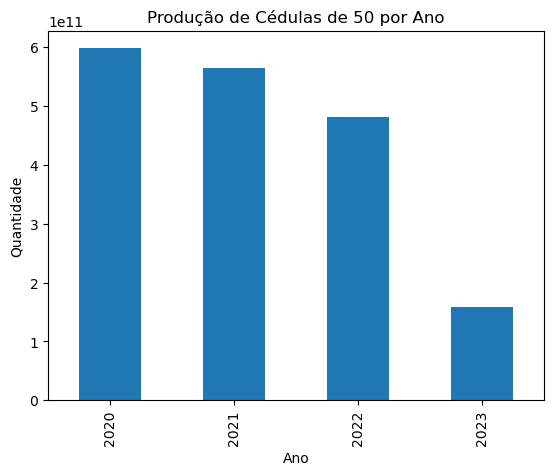

In [ ]:
#17 - Usei a mesma função 14 para plotar um gráfico da produção de notas de 50
df_notas_50 = df.loc[(df['Valor'] == 50) & (df['Ano'] >= 2020)]
df_agrupado_ano_50 = df_notas_50.groupby('Ano')['Quantidade'].sum()

df_agrupado_ano_50.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Produção de Cédulas de 50 por Ano')
plt.show()

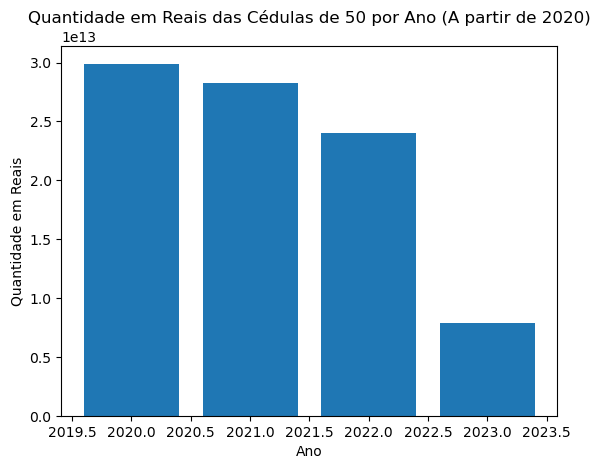

In [ ]:
#18 - Filtrei a quantidade em reais produzidas pelas notas de 50 a partir de 2020
df_cedulas_50 = df[(df['Valor'] == 50) & (df['Ano'] >= 2020)]  # Filtra apenas as cédulas de valor 50 a partir de 2020
df_agrupado_ano_reais_50 = df_cedulas_50.groupby('Ano')['Quantidade em Reais'].sum()

plt.bar(df_agrupado_ano_reais_50.index, df_agrupado_ano_reais_50.values)
plt.xlabel('Ano')
plt.ylabel('Quantidade em Reais')
plt.title('Quantidade em Reais das Cédulas de 50 por Ano (A partir de 2020)')
plt.show()

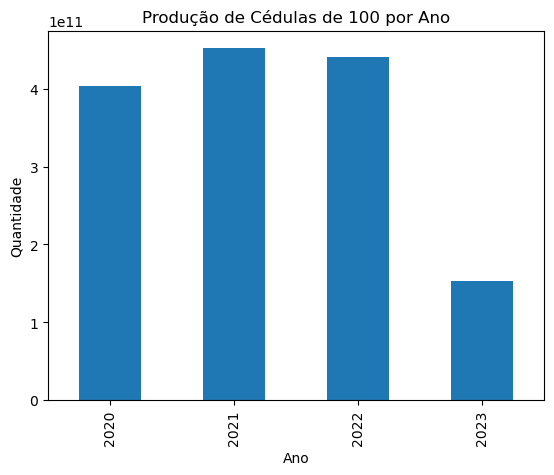

In [ ]:
#19 - Usei a mesma função 14 para plotar um gráfico da produção de notas de 100
df_notas_100 = df.loc[(df['Valor'] == 100) & (df['Ano'] >= 2020)]
df_agrupado_ano_100 = df_notas_100.groupby('Ano')['Quantidade'].sum()

df_agrupado_ano_100.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Produção de Cédulas de 100 por Ano')
plt.show()

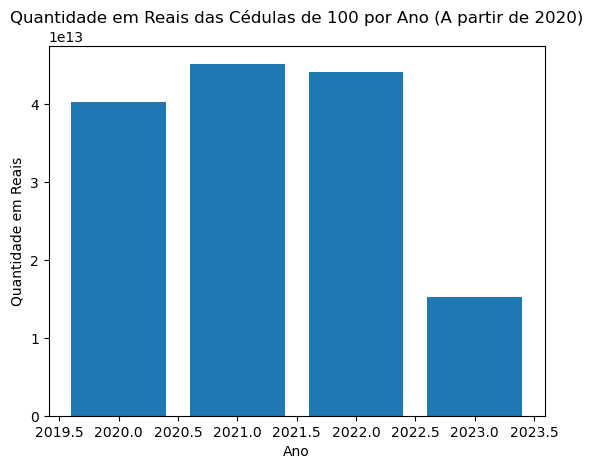

In [ ]:
#20 - Filtrei a quantidade em reais produzidas pelas notas de 100 a partir de 2020
df_cedulas_100 = df[(df['Valor'] == 100) & (df['Ano'] >= 2020)]  # Filtra apenas as cédulas de valor 100 a partir de 2020
df_agrupado_ano_reais_100 = df_cedulas_100.groupby('Ano')['Quantidade em Reais'].sum()

plt.bar(df_agrupado_ano_reais_100.index, df_agrupado_ano_reais_100.values)
plt.xlabel('Ano')
plt.ylabel('Quantidade em Reais')
plt.title('Quantidade em Reais das Cédulas de 100 por Ano (A partir de 2020)')
plt.show()

In [ ]:
#21 - df agrupado em quantidade de reais produzidos por ano
df_agrupado_ano_reais = df.groupby('Ano')['Quantidade em Reais'].sum().reset_index()
df_agrupado_ano_reais

,Ano,Quantidade em Reais
0,1995,2270372498736.52
1,1996,3218022650846.05
2,1997,4097323466939.14
3,1998,4665884437078.81
4,1999,5437004441081.32
5,2000,6251445208339.83
6,2001,7331501064124.28
7,2002,9239030755466.43
8,2003,10649968067546.61
9,2004,12520971152277.20


In [ ]:
#22 - adicionei colunas em milhões, bilhões e trilhões
df_agrupado_ano_reais['Quantidade em Trilhões de Reais'] = df_agrupado_ano_reais['Quantidade em Reais'] / 1e12
df_agrupado_ano_reais['Quantidade em Bilhões de Reais'] = df_agrupado_ano_reais['Quantidade em Reais'] / 1e9
df_agrupado_ano_reais['Quantidade em Milhões de Reais'] = df_agrupado_ano_reais['Quantidade em Reais'] / 1e6
df_agrupado_ano_reais

,Ano,Quantidade em Reais,Quantidade em Trilhões de Reais,Quantidade em Bilhões de Reais,Quantidade em Milhões de Reais
0,1995,2270372498736.52,2.27,2270.37,2270372.50
1,1996,3218022650846.05,3.22,3218.02,3218022.65
2,1997,4097323466939.14,4.10,4097.32,4097323.47
3,1998,4665884437078.81,4.67,4665.88,4665884.44
4,1999,5437004441081.32,5.44,5437.00,5437004.44
5,2000,6251445208339.83,6.25,6251.45,6251445.21
6,2001,7331501064124.28,7.33,7331.50,7331501.06
7,2002,9239030755466.43,9.24,9239.03,9239030.76
8,2003,10649968067546.61,10.65,10649.97,10649968.07
9,2004,12520971152277.20,12.52,12520.97,12520971.15


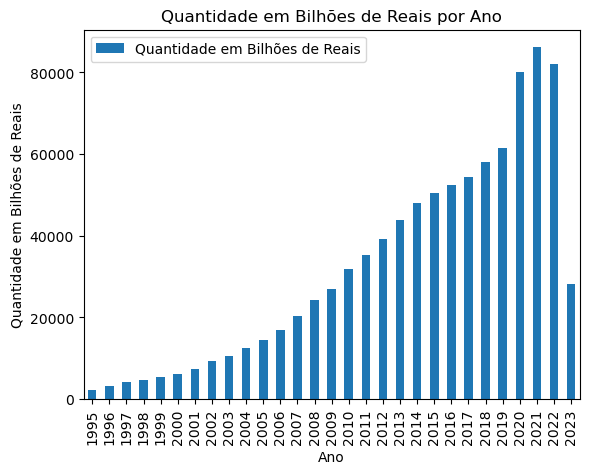

In [ ]:
#23 - Gráfico com as infos
df_agrupado_ano_reais.plot(x='Ano', y='Quantidade em Bilhões de Reais', kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade em Bilhões de Reais')
plt.title('Quantidade em Bilhões de Reais por Ano')
plt.show()

In [ ]:
#24 - Filtro para mostrar as moedas comemorativas e quanto de dinheiro elas produziram (tiramos do passo 7)
df_comemorativas = df_agrupado1.loc[[6, 7, 8], ['Valor', 'Classe', 'Quantidade']]
df_comemorativas['Quantidade em Reais'] = df_comemorativas['Valor'] * df_comemorativas['Quantidade']
df_comemorativas

,Valor,Classe,Quantidade,Quantidade em Reais
6,2.00,"Moedas comemorativas 300 anos CMB, Moedas come...",4565686283709.00,9131372567418.00
7,3.00,"Moedas comemorativas 30 anos BC, Moedas comemo...",162657847.00,487973541.00
8,4.00,"Moedas comemorativas Tetra campeonato, Cartela...",63239133.00,252956532.00


In [ ]:
df_comemorativas = df_agrupado1.loc[[6, 7, 8], ['Valor', 'Classe', 'Quantidade']]
df_comemorativas['Quantidade em Reais'] = df_comemorativas['Valor'] * df_comemorativas['Quantidade']

df_comemorativas = df_comemorativas.merge(df[['Valor', 'Ano']], on='Valor', how='left')
df_comemorativas = df_comemorativas.rename(columns={'Ano': 'Ano de Produção'})

df_comemorativas

,Valor,Classe,Quantidade,Quantidade em Reais,Ano de Produção
0,2.00,"Moedas comemorativas 300 anos CMB, Moedas come...",4565686283709.00,9131372567418.00,1995
1,2.00,"Moedas comemorativas 300 anos CMB, Moedas come...",4565686283709.00,9131372567418.00,1995
2,2.00,"Moedas comemorativas 300 anos CMB, Moedas come...",4565686283709.00,9131372567418.00,1995
3,2.00,"Moedas comemorativas 300 anos CMB, Moedas come...",4565686283709.00,9131372567418.00,1995
4,2.00,"Moedas comemorativas 300 anos CMB, Moedas come...",4565686283709.00,9131372567418.00,1995
...,...,...,...,...,...
93426,4.00,"Moedas comemorativas Tetra campeonato, Cartela...",63239133.00,252956532.00,2023
93427,4.00,"Moedas comemorativas Tetra campeonato, Cartela...",63239133.00,252956532.00,2023
93428,4.00,"Moedas comemorativas Tetra campeonato, Cartela...",63239133.00,252956532.00,2023
93429,4.00,"Moedas comemorativas Tetra campeonato, Cartela...",63239133.00,252956532.00,2023
